# **LIBRERIAS**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded=files.upload()

Saving UserKnowledgeModeling.csv to UserKnowledgeModeling.csv


In [5]:
data=pd.read_csv("UserKnowledgeModeling.csv")

In [7]:
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High


In [10]:
data["UNS"].value_counts()

1    129
2    122
3    102
0     50
Name: UNS, dtype: int64

In [11]:
data["UNS"]=data["UNS"].replace("Very Low",0)
data["UNS"]=data["UNS"].replace("very_low",0)
data["UNS"]=data["UNS"].replace("Low",1)
data["UNS"]=data["UNS"].replace("Middle",2)
data["UNS"]=data["UNS"].replace("High",3)
#.....
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,0
1,0.05,0.05,0.55,0.60,0.14,1
2,0.08,0.18,0.63,0.60,0.85,3
3,0.20,0.20,0.68,0.67,0.85,3
4,0.22,0.22,0.90,0.30,0.90,3
...,...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58,3
399,0.78,0.61,0.71,0.19,0.60,2
400,0.54,0.82,0.71,0.29,0.77,3
401,0.50,0.75,0.81,0.61,0.26,2


In [12]:
data["UNS"].value_counts()

1    129
2    122
3    102
0     50
Name: UNS, dtype: int64

In [13]:
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,0
1,0.05,0.05,0.55,0.60,0.14,1
2,0.08,0.18,0.63,0.60,0.85,3
3,0.20,0.20,0.68,0.67,0.85,3
4,0.22,0.22,0.90,0.30,0.90,3


In [14]:
data.describe()

,STG,SCG,STR,LPR,PEG,UNS
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360,1.684864
std,0.212018,0.215531,0.246684,0.257545,0.266775,0.986195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000,1.000000
50%,0.300000,0.300000,0.440000,0.330000,0.400000,2.000000
75%,0.480000,0.510000,0.680000,0.650000,0.660000,3.000000
max,0.990000,0.900000,0.950000,0.990000,0.990000,3.000000


In [15]:
print("la cantidad de datos es=",len(data))

la cantidad de datos es= 403


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5   UNS     403 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 19.0 KB


In [17]:

pd.DataFrame(np.unique(data["UNS"],return_counts=True),columns=["Muy bajo","Bajo","Medio","Alto"]).T

,0,1
Muy bajo,0,50
Bajo,1,129
Medio,2,122
Alto,3,102


In [18]:
data0=data[["STG","SCG","STR","LPR","PEG"	]]
data0

,STG,SCG,STR,LPR,PEG
0,0.00,0.10,0.50,0.26,0.05
1,0.05,0.05,0.55,0.60,0.14
2,0.08,0.18,0.63,0.60,0.85
3,0.20,0.20,0.68,0.67,0.85
4,0.22,0.22,0.90,0.30,0.90
...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58
399,0.78,0.61,0.71,0.19,0.60
400,0.54,0.82,0.71,0.29,0.77
401,0.50,0.75,0.81,0.61,0.26


# **ALGORITIMOS DE AGRUPAMIENTO**


Vamos a aplicar los algoritmos de clustering para el conjunto de datos data0. vamos a aplicar los 4 algoritmos

1. K_MEANS

2. CLUSTERING JERARQUICO

3. CLUSTERING BASADO EN LA DENSIDAD(DBSCAN)

4. ALGORTIMO MEAN SHIFT

# **PAIRPLOT**

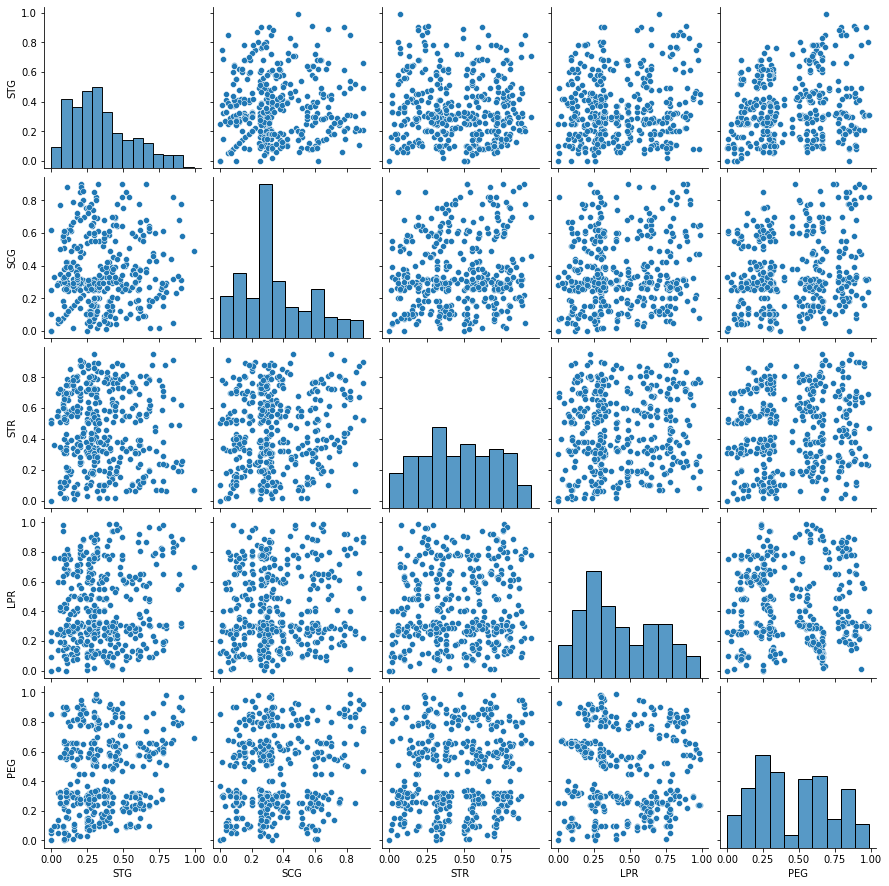

In [19]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(data0,aspect=1)
plt.show()

# **1. K-MEAN**

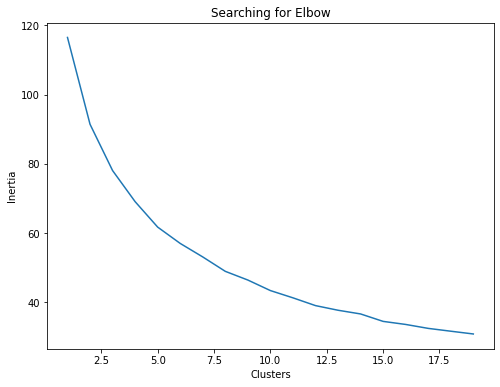

In [20]:
from sklearn.cluster import KMeans

clusters = []
for i in range(1, 20):
    km = KMeans(n_clusters=i).fit(data0)
    clusters.append(km.inertia_) 
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 20)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

# **CON 4 CLUSTERS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


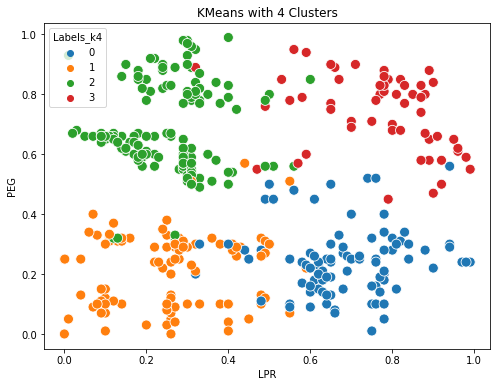

In [21]:
# 4 cluster
km4 = KMeans(n_clusters=4).fit(data0)
data['Labels_k4'] = km4.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k4'], palette=sns.color_palette('tab10', 4), s=100)
plt.title('KMeans with 4 Clusters')
plt.show()

# **CON 5 CLUSTERS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


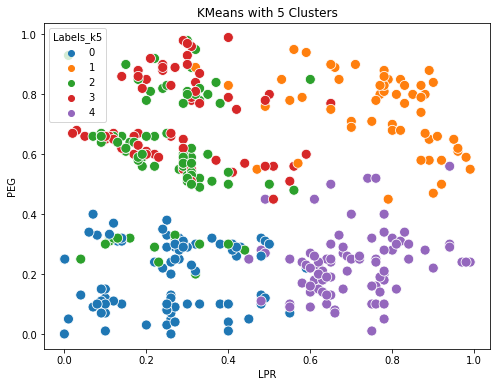

In [22]:
# 5 cluster
km5 = KMeans(n_clusters=5).fit(data0)
data['Labels_k5'] = km5.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k5'], palette=sns.color_palette('tab10', 5), s=100)
plt.title('KMeans with 5 Clusters')
plt.show()

## parece una buena opcion tomar 4 cluster:

. cluster 0: ALTO LPR Y BAJO PEG

. cluster 1: BAJO LPR Y ALTO PEG

. cluster 2: BAJO LPR Y BAJO PEG

. cluster 3: ALTO LPR Y ALTO PEG


# **2. CLUSTERING JERARQUICO ( AGLOMERATIVO)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


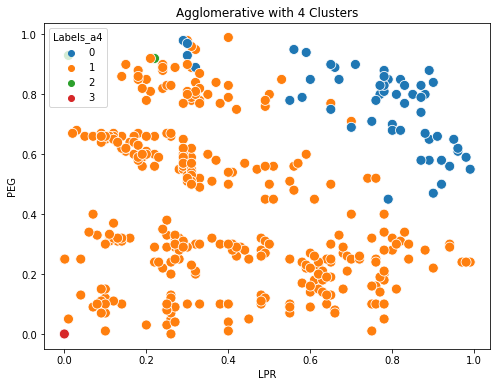

In [23]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=4, linkage='average').fit(data0)

data['Labels_a4'] = agglom.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_a4'], palette=sns.color_palette('tab10', 4), s=100)

plt.title('Agglomerative with 4 Clusters')
plt.show()

In [24]:
data[data['Labels_a4']==3]

,STG,SCG,STR,LPR,PEG,UNS,Labels_k4,Labels_k5,Labels_a4
145,0.0,0.0,0.0,0.0,0.0,0,1,0,3


**Observando los gràficos el k-mean con 4 cluster es mucho mejor que el clustering jerarquico con 4.**

## **3. CLUSTERING BASADO EN LA DENSIDAD (DBSCAN)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


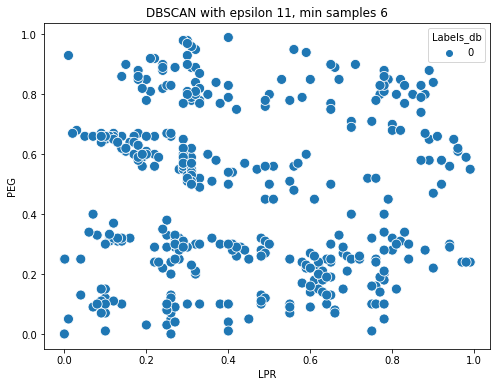

In [25]:
from sklearn.cluster import DBSCAN 
db = DBSCAN(eps=11, min_samples=6).fit(data0)
data['Labels_db'] = db.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_db'], palette=sns.color_palette('tab10', np.unique(db.labels_).shape[0]), s=100)
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()


Se descarta  DBSCAN tambien.Solo muestra  1 cluster

# **4. ALGORITMO MEAN SHIFT**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


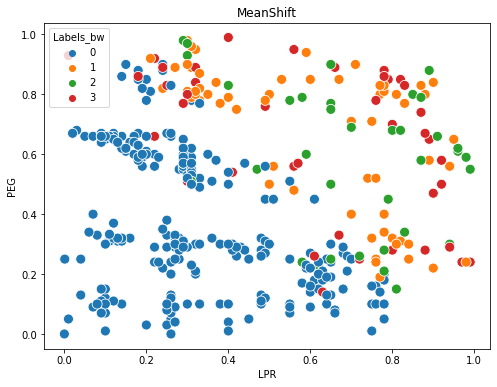

In [26]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(data0, quantile=0.0819)
ms = MeanShift(bandwidth=bandwidth).fit(data0)

data['Labels_bw'] = ms.labels_
plt.figure(figsize=(8,6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_bw'], palette=sns.color_palette('tab10', np.unique(ms.labels_).shape[0]), s=100)
plt.plot()
plt.title('MeanShift')
plt.show()


Algoritmo mean shift se descarta tambien.


In [27]:
data1=data.copy()

In [34]:
data1["UNS"].value_counts()

1    129
2    122
3    102
0     50
Name: UNS, dtype: int64

In [35]:
data1["Labels_k4"].value_counts()

2    137
1    113
0     98
3     55
Name: Labels_k4, dtype: int64

In [36]:

data1["UNS_Kmeans"]=data1["Labels_k4"].replace(1,22)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(2,11)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(3,10)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(0,30)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(22,2)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(11,1)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(10,0)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(30,3)
data1["UNS_Original"]=data1["UNS"].replace(0,"Muy Bajo")
data1["UNS_Original"]=data1["UNS_Original"].replace(1,"Bajo")
data1["UNS_Original"]=data1["UNS_Original"].replace(2,"Medio")
data1["UNS_Original"]=data1["UNS_Original"].replace(3,"Alto")
data1



,STG,SCG,STR,LPR,PEG,UNS,Labels_k4,Labels_k5,Labels_a4,Labels_db,Labels_bw,UNS_Kmeans,UNS_Original
0,0.00,0.10,0.50,0.26,0.05,0,1,0,1,0,0,2,Muy Bajo
1,0.05,0.05,0.55,0.60,0.14,1,0,4,1,0,0,3,Bajo
2,0.08,0.18,0.63,0.60,0.85,3,2,2,0,0,1,1,Alto
3,0.20,0.20,0.68,0.67,0.85,3,3,1,0,0,1,0,Alto
4,0.22,0.22,0.90,0.30,0.90,3,2,2,1,0,1,1,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58,3,3,1,0,0,3,0,Alto
399,0.78,0.61,0.71,0.19,0.60,2,2,2,1,0,0,1,Medio
400,0.54,0.82,0.71,0.29,0.77,3,2,2,1,0,3,1,Alto
401,0.50,0.75,0.81,0.61,0.26,2,0,4,1,0,3,3,Medio


# **PORCENTAJE DE ERROR**

In [37]:

from sklearn.metrics import accuracy_score, mean_absolute_percentage_error


(1 - accuracy_score(data1["UNS_Kmeans"],data1["UNS"]))*100



97.02233250620348

# **TODOS LOS ALGORITMOS**

# **CONCLUSIONES**

De los 4 algoritmos se escoge k-mean con 4 labels puesto que es el que mejor divide a los datos.clustering jerarquico,DBSCAN y mean shift no realizan el clusterindg de una forma adecuada por lo tanto no son la mejor opcion.